1. Возьмите полутоновые изображения с образовательного портала.

2. Постройте гистограммы изображений, например, так.

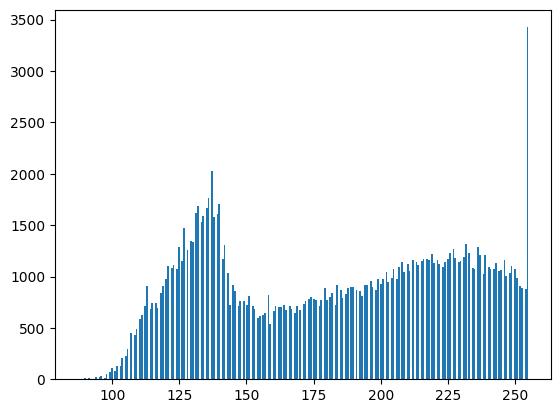

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from PIL import Image
import numpy as np# Подключаем библиотеку для работы с числовыми массивамиnumpy# под псевдонимом np
%matplotlib inline
img = Image.open("img//arch.jpg").convert('RGB')
plt.hist(np.ravel(img), bins=256)
plt.show()

Что можно сказать про изображения на основе анализа гистограмм?

фон картинки который зполняет большую часть в белых цветах

3. Подберите и выполните логарифмические преобразования изображенийспомощью попиксельной обработки, постройте гистограммыполученныхизображений. 

Совет: чтобы видеть различия в исходных и получающихсякартинках,располагайте их рядом, используя subplot.

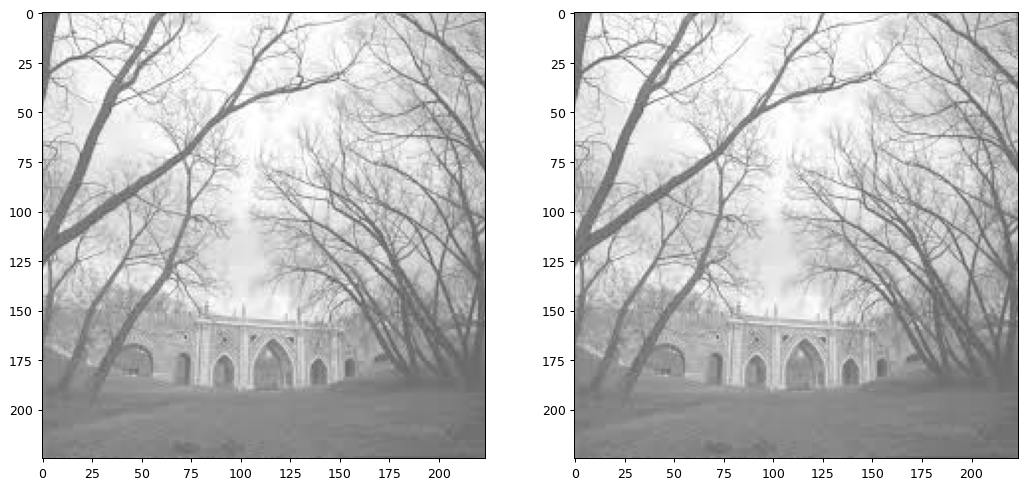

In [4]:
def draw_image2(image1, image2):
    plt.figure(figsize=(14,8), dpi=90)
    plt.subplot(1, 2, 1)
    plt.imshow(image1)
    plt.subplot(1, 2, 2)
    plt.imshow(image2)
    plt.show()

img_copy = img.copy() # сделаем копию изображения, в которой и будут происходить изменения
pixels = img_copy.load() # список с пикселями
x, y = img_copy.size # ширина (x) и высота (y) изображения
for i in range(x):
    for j in range(y):
        r, g, b = pixels[i, j]
        pixels[i, j] = b, g, r # Смена каналов
draw_image2(img, img_copy)

в чб фотографии ничего не изменилось

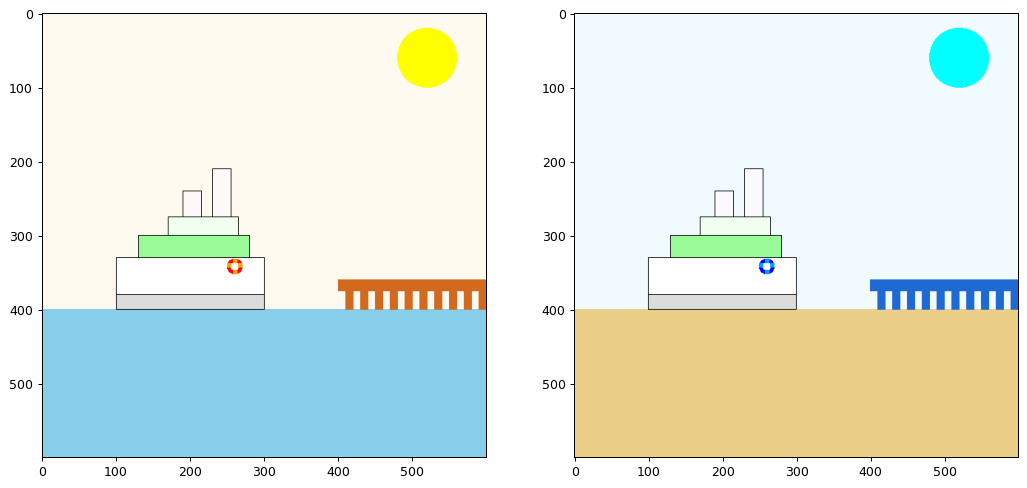

In [5]:
img = Image.open("img//Детский рисунок.png").convert('RGB')
img_copy = img.copy() # сделаем копию изображения, в которой и будут происходить изменения
pixels = img_copy.load() # список с пикселями
x, y = img_copy.size # ширина (x) и высота (y) изображения
for i in range(x):
    for j in range(y):
        r, g, b = pixels[i, j]
        pixels[i, j] = b, g, r # Смена каналов
draw_image2(img, img_copy)

в цветном цвета поменялись, крсный и синий каналы заменили друг друга

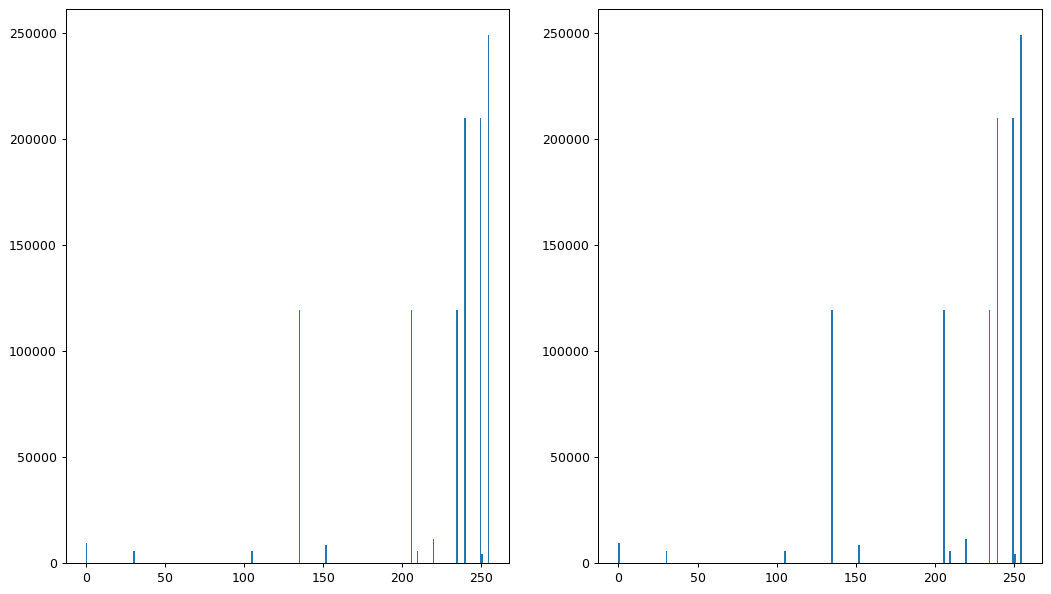

In [6]:
plt.figure(figsize=(14,8), dpi=90)
plt.subplot(1, 2, 1)
plt.hist(np.ravel(img), bins=256)
plt.subplot(1, 2, 2)
plt.hist(np.ravel(img_copy), bins=256)
plt.show()


на цветном изображении гистаграммы ничего интересного не показывают

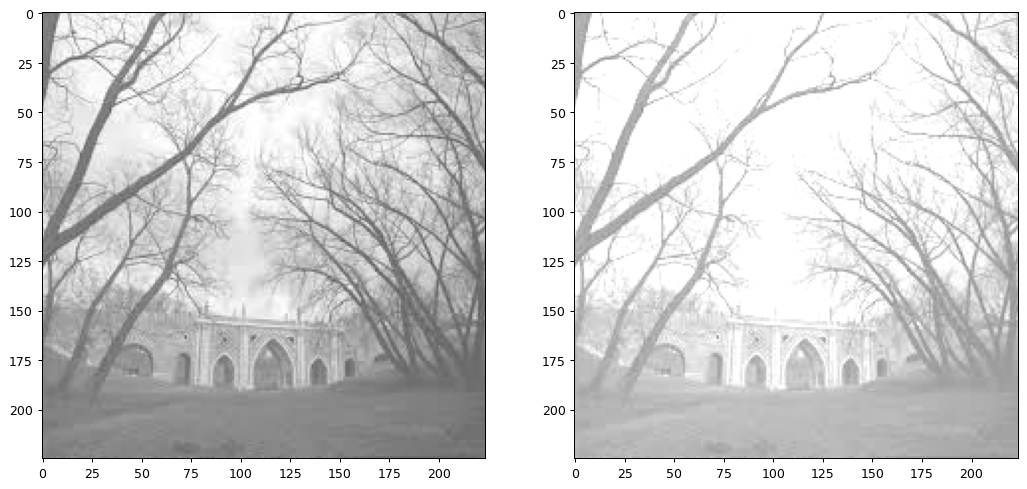

In [7]:
img = Image.open("img//arch.jpg").convert('RGB')
img_copy = img.copy()  # сделаем копию изображения, в которой и будут происходить изменения
pixels = img_copy.load()  # список с пикселями
x, y = img_copy.size  # ширина (x) и высота (y) изображения
for i in range(x):
    for j in range(y):
        r, g, b = pixels[i, j]
        r += 50
        g += 50
        b += 50
        if r > 255:
            r = 255
        if g > 255:
            g = 255
        if b > 255:
            b = 255
        pixels[i, j] = r, g, b  # Смена каналов
draw_image2(img, img_copy)

каждый канал засветлил на 50, сделал проверку, чтобы не превышало 255

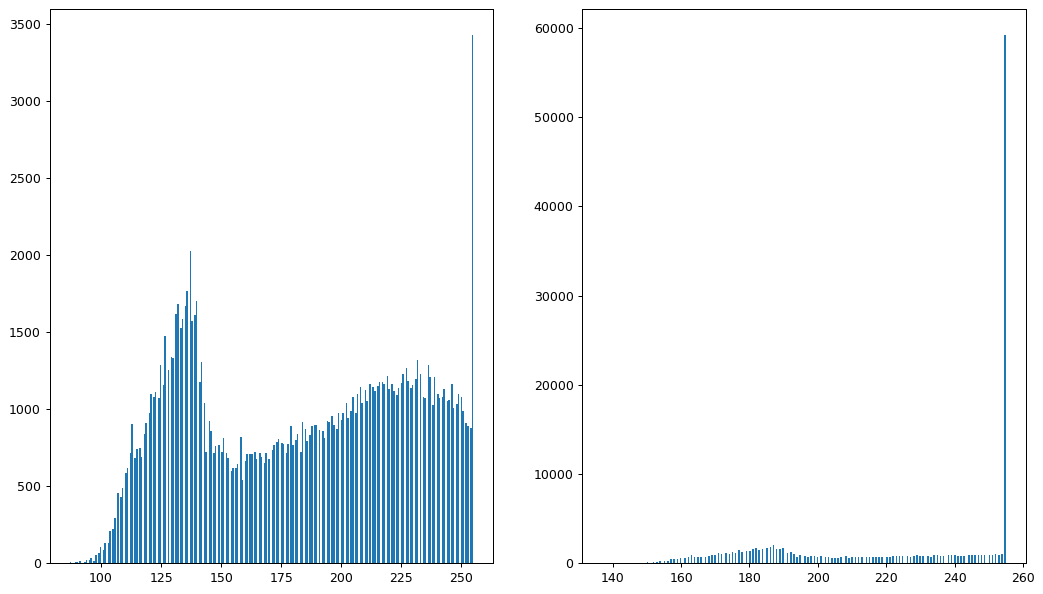

In [8]:
plt.figure(figsize=(14,8), dpi=90)
plt.subplot(1, 2, 1)
plt.hist(np.ravel(img), bins=256)
plt.subplot(1, 2, 2)
plt.hist(np.ravel(img_copy), bins=256)
plt.show()

по гистаграмме видно, что вся картинка стала почти одного цвета и детали менее различимы, чем на оригинале (не видно многих мелких веток)

4. Подберите степенные преобразования и выполните гамма-коррекциюизображений, постройте гистограммы полученных изображений. Чтоможносказать про результаты преобразований? Что дает анализ гистограмм?

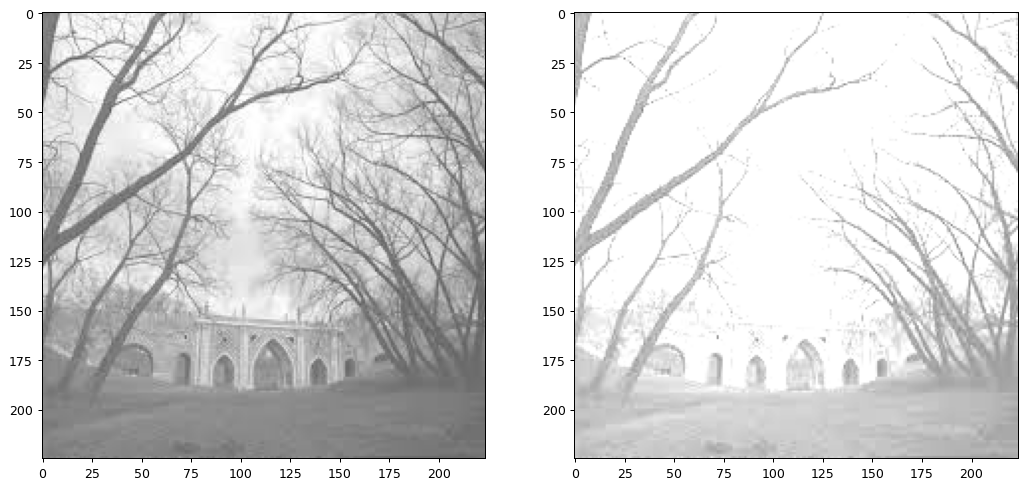

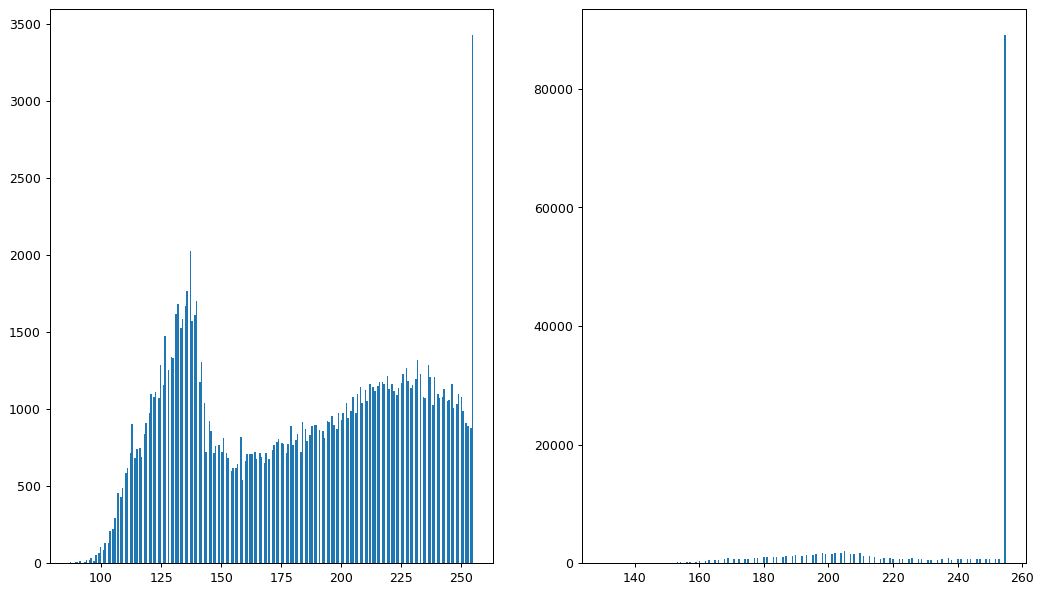

In [13]:
img = Image.open("img//arch.jpg").convert('RGB')
img_copy = img.copy()  # сделаем копию изображения, в которой и будут происходить изменения
pixels = img_copy.load()  # список с пикселями
x, y = img_copy.size  # ширина (x) и высота (y) изображения
for i in range(x):
    for j in range(y):
        r, g, b = pixels[i, j]
        r *= 1.5
        g *= 1.5
        b *= 1.5
        pixels[i, j] = int(r), int(g), int(b)  # Смена каналов
draw_image2(img, img_copy)

plt.figure(figsize=(14,8), dpi=90)
plt.subplot(1, 2, 1)
plt.hist(np.ravel(img), bins=256)
plt.subplot(1, 2, 2)
plt.hist(np.ravel(img_copy), bins=256)
plt.show()

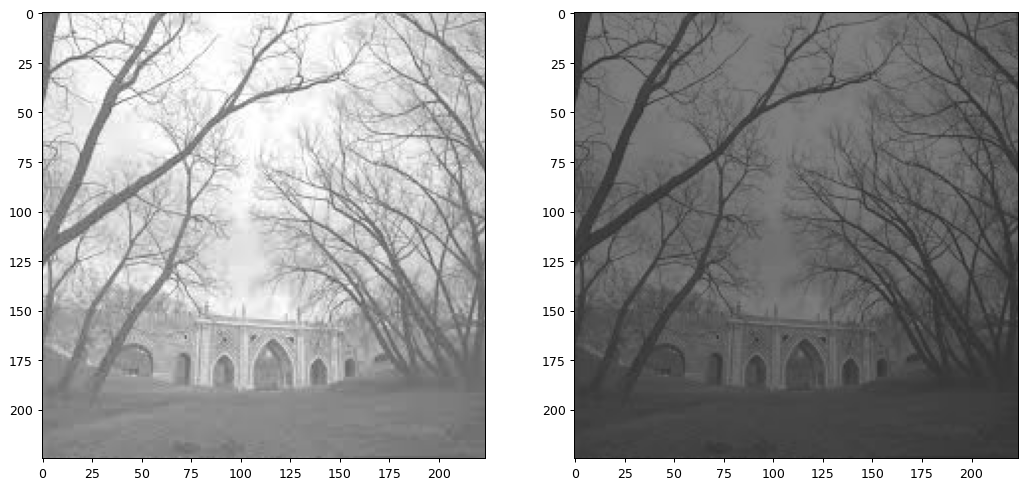

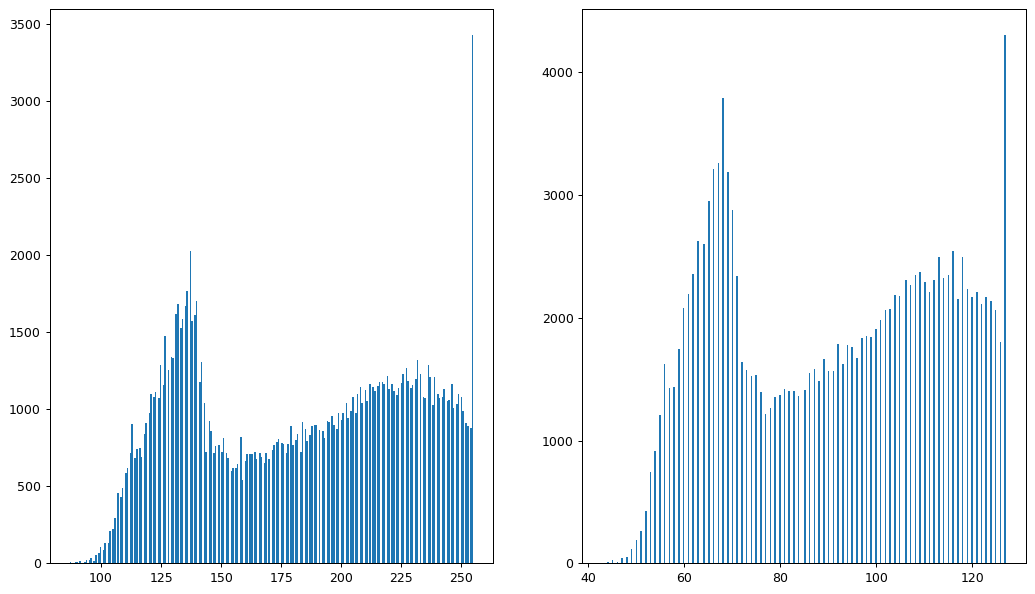

In [14]:
img = Image.open("img//arch.jpg").convert('RGB')
img_copy = img.copy()  # сделаем копию изображения, в которой и будут происходить изменения
pixels = img_copy.load()  # список с пикселями
x, y = img_copy.size  # ширина (x) и высота (y) изображения
for i in range(x):
    for j in range(y):
        r, g, b = pixels[i, j]
        r *= 0.5
        g *= 0.5
        b *= 0.5
        pixels[i, j] = int(r), int(g), int(b)  # Смена каналов
draw_image2(img, img_copy)

plt.figure(figsize=(14,8), dpi=90)
plt.subplot(1, 2, 1)
plt.hist(np.ravel(img), bins=256)
plt.subplot(1, 2, 2)
plt.hist(np.ravel(img_copy), bins=256)
plt.show()

изображения осветлились и затемнились соответсвенно, гистаграммы подтверждают это

5. Поэкспериментируйте с кусочно-линейными преобразованиями


In [17]:
def draw_image3(image, imageNew):
    plt.figure(figsize=(16,13), dpi=90)
    plt.subplot2grid((3,3), (0,0))
    plt.imshow(image)
    plt.title('Исходное изображение')
    plt.subplot2grid((3,3), (0,1))
    plt.imshow(imageNew)
    plt.title('Преобразованное изображение')
    #Гистограммы двух изображений
    plt.subplot2grid((3,3), (0,2))
    plt.hist(np.ravel(image), bins=256, label=['Оригинал'])
    plt.hist(np.ravel(imageNew), bins=256, label=['Результат'])
    plt.title('Гистограмма интенсивности цвета')
    plt.legend()
    plt.show()
    #imageNew.show()

In [18]:
from PIL import ImageDraw
def transform(f, img):
    img_copy = img.copy() # Преобразовывать будем копию исходного изображения
    draw = ImageDraw.Draw(img_copy) #Создаем инструмент для рисования
    width = img_copy.size[0] #Определяем ширину
    height = img_copy.size[1] #Определяем высоту
    pixels = img_copy.load() #Выгружаем значения пикселей
    for i in range(width):
        for j in range(height):
            r, g, b = pixels[i, j]
            S = tuple(map(f, (r, g, b)))
            draw.point((i, j), S)
    draw_image3(img, img_copy) 

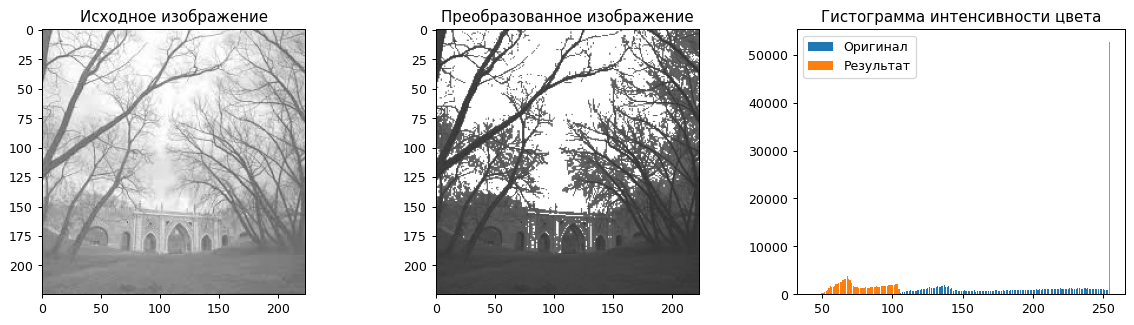

In [19]:
img = Image.open("img//arch.jpg").convert('RGB')
def f1(x): 
    x1 = 70
    x2 = 210
    if x < x1 or x > x2:
        return int(2 * x)
    return int(0.5 * x)

transform(f1, img)

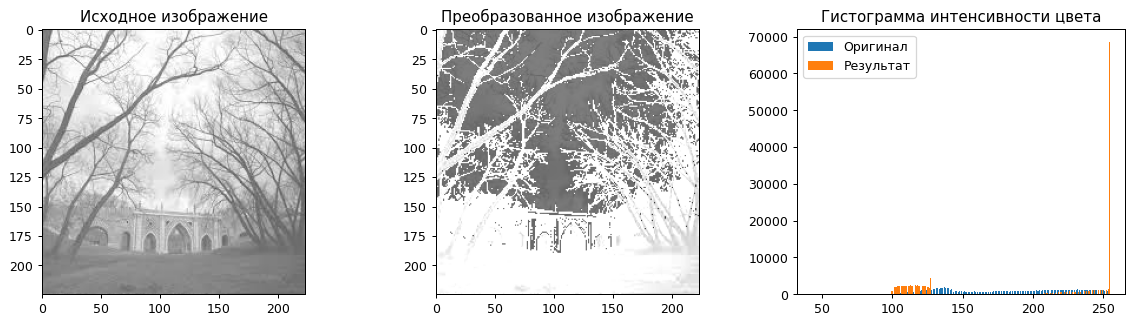

In [21]:
def f2(x): # 2е из кусочно-линейных преобразований
    x1 = 100
    x2 = 200
    if x < x1 or x > x2:
        return int(0.5 * x)
    return int(2 * x)
transform(f2, img)

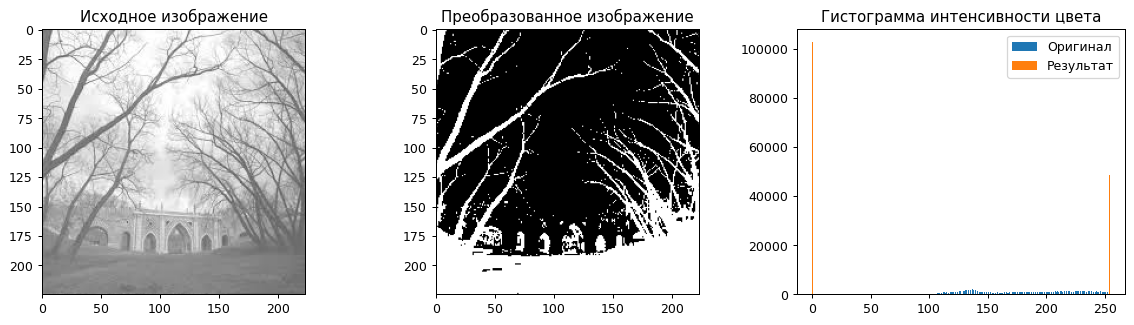

In [22]:
def f3(x): # интервальная бинаризация
    x1 = 50
    x2 = 150
    if x2 > x > x1:
        return 255
    return 0
transform(f3, img)

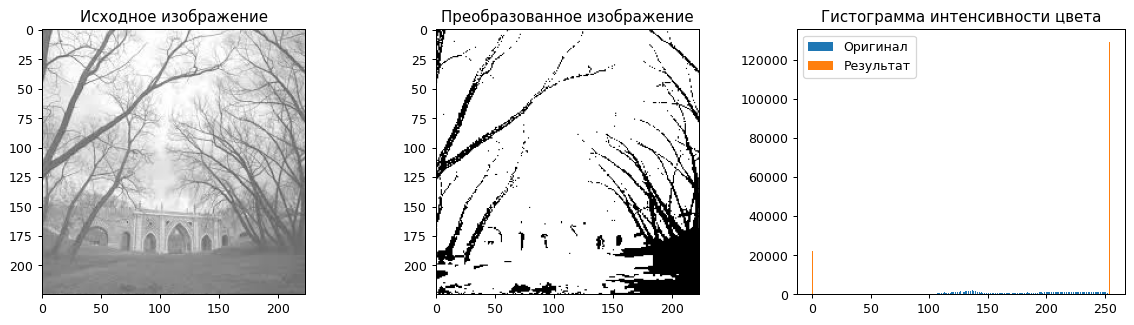

In [23]:
def f4(x): 
    x2 = 130
    if x < x2:
        return 0
    return 255
transform(f4, img)

6. Попробуйте выполнить пороговую сегментациюдля многопиковыхгистограмм, локализуйте отдельные объекты на изображениях с еепомощью.Что можно сказать про результаты преобразований? Чтодаетанализгистограмм?

In [24]:
def draw_image_hist(image):
    plt.figure(figsize=(10,8), dpi=90)
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(image)
    plt.title('Исходное изображение')
    plt.subplot2grid((2,2), (0,1))
    plt.hist(np.ravel(image), bins=256)
    plt.title('Гистограмма интенсивности цвета')
    plt.show()

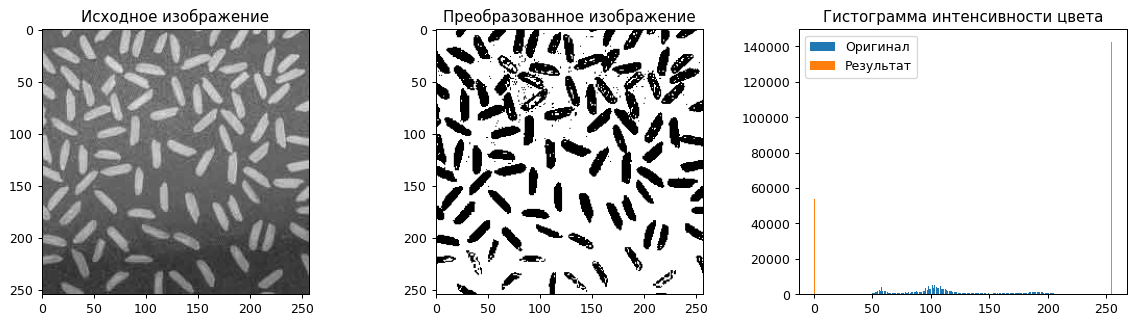

In [33]:
def f_bin(x):
    return 0 if x in range(130, 210) else 255
transform(f_bin, img)

попробовал оставить только рис, но дальше или видно не все рисинки или появляется шум от фона